# Polynomial Linear Regression

In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import statsmodels.api as sm  # For OLS Regression

In [2]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [3]:
#step:3 : Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [4]:
# Step 4: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [5]:
# Step 4: Create and train the Polynomial Regression model
model = LinearRegression()  # Initializing the model
model.fit(X_poly, Y)  # Training the model

LinearRegression()

In [9]:
# Step 5: Get the values of slope and intercept from the trained model
m = model.coef_[0]
c = model.intercept_
print("Slope (m):", model.coef_[0])  # m value
print("Intercept (c):", model.intercept_)  # c value

Slope (m): 0.0
Intercept (c): 25.834848216909297


Equation of line Y = 0.00X + 25.83


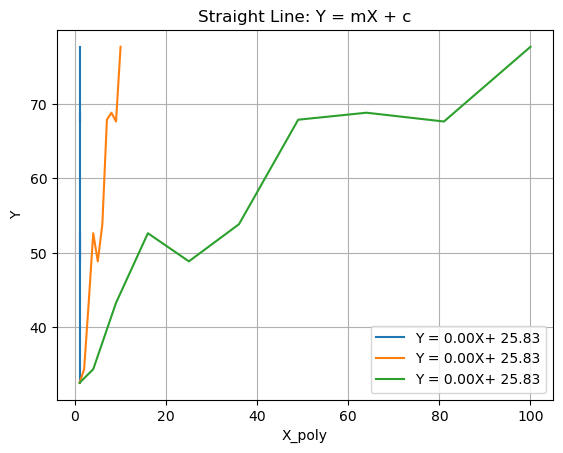

In [12]:
# Step 6: Display the equation of the line
print(f"Equation of line Y = {m:.2f}X + {c:.2f}")
plt.plot(X_poly, Y, label=f'Y = {m:.2f}X+ {c:.2f}')
plt.xlabel('X_poly')
plt.ylabel('Y')
plt.title('Straight Line: Y = mX + c')
plt.legend()
plt.grid(True)

In [16]:
Y_pred = model.predict(X_poly)
print(Y_pred)

[31.52544525 37.07102251 42.47157998 47.72711768 52.8376356  57.80313374
 62.62361211 67.29907069 71.8295095  76.21492852]


In [17]:
# Step 7: Predit values using the model
#Mean square error
mse = mean_squared_error(Y,Y_pred)
print(f"Mean Squared Error(MSE):{mse:.2f}")

Mean Squared Error(MSE):11.47


In [18]:
#Mean Absolute Error
mae = mean_absolute_error(Y,Y_pred)
print(f"Mean Absolute Error(MAE):{mae:.2f}")

Mean Absolute Error(MAE):2.98


In [19]:
#Root Mean Square Error
rsme = np.sqrt(mse)
print(f" Root Mean Squared Error(RSME):{rsme:.2f}")

 Root Mean Squared Error(RSME):3.39


In [20]:
#R-Square - To calculate the accuracy of the model-Represents how well the model fits the data(0 to 1,where 1 is best)  
r2 = r2_score(Y,Y_pred)
print(f" R-Squared (R^2):{r2:.2f}")

 R-Squared (R^2):0.95


In [21]:
#Adjusted R-squared(R^2_adj)-Adjusted for the number of predictors,better for multiple regression
n=len(Y)#Number of observations
p=1#Number of independent variables(Experience)
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f" Adjusted R-Squared (R^2):{adj_r2:.2f}")

 Adjusted R-Squared (R^2):0.94


In [22]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:22:53   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\CVR\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


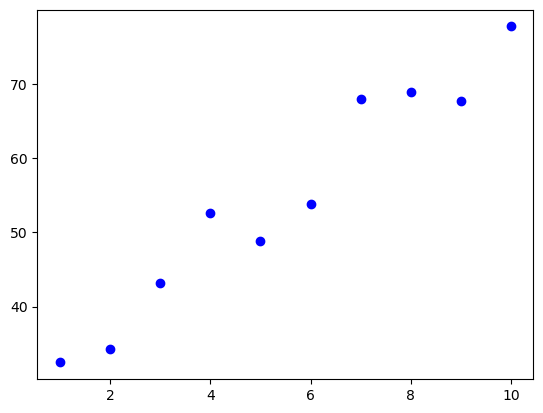

In [24]:
plt.scatter(X,Y,color='blue',label='Actual data')
plt.show()

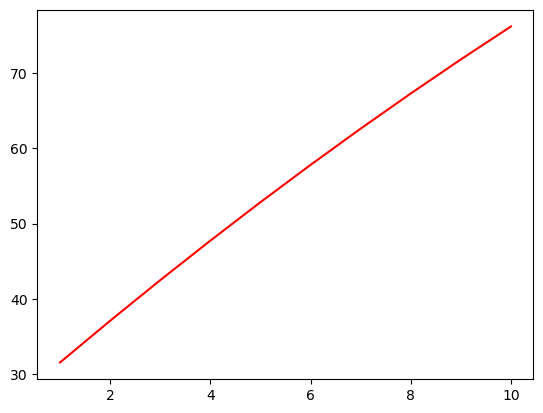

In [25]:
plt.plot(X,Y_pred,color='red',label='Best Fit Line')

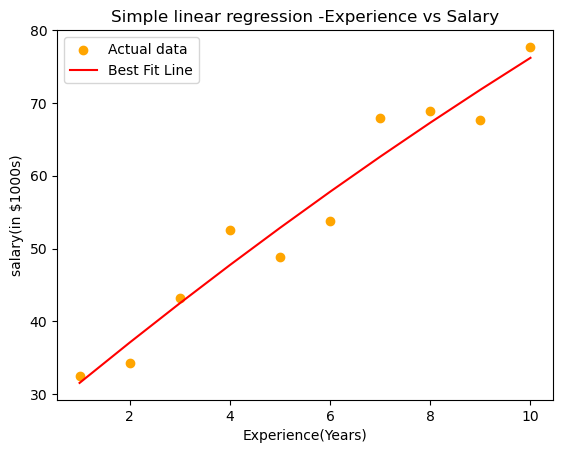

In [26]:
# Step 8: Plot the regression line
plt.scatter(X,Y,color='orange',label='Actual data')
plt.plot(X,Y_pred,color='red',label='Best Fit Line')
plt.xlabel('Experience(Years)')
plt.ylabel('salary(in $1000s)')
plt.title('Simple linear regression -Experience vs Salary')
plt.legend()
plt.show()